# Predicting Water Quality: Safe or Not Safe for Consumption  #

<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWgyMTlmdjk3aHFjejM0ZGp1ZjhlYnBjbGIwbjM2NGN4MnV0eTdvYiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/S1N2zUokK7jiM/giphy.gif" width = "600"/>

Source: https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWgyMTlmdjk3aHFjejM0ZGp1ZjhlYnBjbGIwbjM2NGN4MnV0eTdvYiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/S1N2zUokK7jiM/giphy.gif

<font color='#808080'>

# Table of Contents:

## [1. Introduction](#intro)
* ### [1.1. Why is water safety an important topic?](#1.1)
* ### [1.2. Background Information & Our Question](#1.2)
* ### [1.3. Dataset Being Used](#1.3)
  
## [2. Preliminary exploratory data analysis](#2)
* ### [2.1. Loading the Data](#2.1)
* ### [2.2 Summarizing the Data](#sum)
* ### [2.3 Visualizing the Data](#viz)

## [3. Methods](#3)
* ### [3.1. Conducting our Data Analysis](#cond)
* ### [3.2. Preparing our Classifier](#3.2)
* ### [3.3. Choosing the Number of Neighbors](#k)
* ### [3.4. Further Visualizing the Results](#vr)



## [4. Expected Outcomes & Significance](#4)


## [5. References](#ref)
</font>


## 1. Introduction: <a id="intro"></a>

### 1.1. Why is Water Safety an Important Topic? <a id="1.1"></a>

Water is essential to all those who call Earth their home, and access to safe drinking water is a major component of effective policy for health protection. Having safe drinking water helps prevent the spread of infectious diseases that could impact the health of local communities. According to the World Health Organization (2023), in 2022 alone, “115 million people collect[ed] untreated surface water from lakes, ponds, rivers and streams”. As such, these waters are far more prone to contaminants that may strike people with intense illnesses, like cholera, diarrhoea, dysentery, hepatitis A, typhoid and polio. Given that these unsafe water put hundreds of millions of people worldwide at risk, water safety is a serious health and development issue at a national, regional, and local level. Different levels of different contaminants found in drinking water can lead to safety issues, that in turn negatively impact the quality of life of those affected. Finding contaminants in water and determining if the amounts make it unfit for consumption is an important step to ensure drinking water remains safe for all who need it. 


### 1.2. Background Information & Our Question <a id="1.2"></a>

Given how large of a concern water safety, we ask the question: **can we construct a model that predicts and classifies whether a sample of water is safe to consume or not, given a set of measured contaminant levels?** To answer this question, we will be using some of the most commonly found pollutants in water as predictors for water quality, such as arsenic, bacteria, lead, nitrates, nitrites, and viruses (United States Environmental Protection Agency, 2015) to check whether or not they make the water unsafe to drink. These 6 elements are chosen because according to the US Environmental Protection Agency guidance, arsenic, lead, nitrates, and nitrites are the most common and harmful inorganic chemicals and bacteria as well as viruses are the most common and harmful microorganisms found in drinking water. 

### 1.3. Dataset Being Used <a id="1.3"></a>

The dataset we are using was found on Kaggle (https://www.kaggle.com/datasets/mssmartypants/water-quality), and it provides information on different contaminants in water and their maximum concentration allowed to be present for the water to remain safe to use. With nearly 8000 observations, it contains 20 predictor variables (the 6 most common contaminants will be used for predictors in our model), and one binary response variable.

## 2. Preliminary exploratory data analysis <a id="2"></a>
### 2.1. Loading the Data <a id="2.1"></a>

As seen below, we can load the dataset using the read_csv function, given that it a .csv file. To load in the dataset, we are using a GitHub raw URL (which links to the dataset we downloaded from Kaggle and added into our github repository) to load it in.

In [37]:
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("themis")
library(themis)
options(repr.matrix.max.rows = 6)
install.packages("kknn")
library(kknn)


url <- "https://raw.githubusercontent.com/zayan-sheikh/DSCI-G13-Project/main/data/waterQuality1.csv"
raw_data <- read_csv(url) |>
            mutate(is_safe = as_factor(is_safe))|>
            mutate(is_safe = fct_recode(is_safe, 'safe' = '1', 'not safe' = '0')) |>
            select(arsenic, bacteria, viruses, lead, nitrates, nitrites, is_safe) |>
            na.omit()
"Table 1. A glimpse of our raw data"
head(raw_data)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 7999 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (21): aluminium, ammonia, arsenic, barium, cadmium, chloramine, chromium...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1. A glimpse of our raw data"

arsenic,bacteria,viruses,lead,nitrates,nitrites,is_safe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.04,0.20,0.000,0.054,16.08,1.13,safe
0.01,0.65,0.650,0.100,2.01,1.93,safe
0.04,0.05,0.003,0.078,14.16,1.11,not safe
0.04,0.71,0.710,0.016,1.41,1.29,safe
0.03,0.13,0.001,0.117,6.74,1.11,safe
0.03,0.67,0.670,0.135,9.75,1.89,safe


*This is a glimpse at the first 6 rows of our dataset. There are 20 variables and one class variable which will be used as our predicting class. As mentioned, we will limit our predictor variables to the 6 most common contaminants. Our prediction will be based on the amount of different materials in water samples which will be used to predict water safety. Our two conclusions to our analysis on the dataset will be either safe or not safe.*

**NOTE:** This data is already tidy, as each column denotes a variable (either contaminant level or water safety), each row denotes an observation, and each cell denotes a value.

In the cell below, we will split our data into training data, and testing data.

In [8]:
set.seed(1)
water_split <- initial_split(raw_data, prop = 0.75, strata = is_safe)
water_train <- training(water_split)
water_test <- testing(water_split)

### 2.2. Summarizing the Data <a id="sum"></a>
Now, it would be useful to summarize this data to get a sense of its distribution. One way to do this would be to find the mean of each predictor variable, and also the proportion of safe to unsafe water. The cleaned data frame is categorized into 2 categories by using group_by and summarize functions to identify whether the water is safe or not, and the number of safe and unsafe water observations is counted, as shown below:

In [48]:
water_wrangled <- water_train |>
                    pivot_longer(cols = arsenic:nitrites, names_to = "contaminant", values_to = "level")

water_means <- water_wrangled |> 
                     na.omit() |>
                     group_by(contaminant)|>
                     summarize(average_value = mean(level))
"Table 2. Mean values for all predictors"
water_means

# Manipulating data to get number of observations for each class
water_train_table <- water_train |> 
                     na.omit() |>
                     group_by(is_safe)|>
                     summarize(count = n())
"Table 3. Number of observations for the class variable"
water_train_table


[1] "Table 2. Mean values for all predictors"

contaminant,average_value
<chr>,<dbl>
arsenic,0.16586310
bacteria,0.31943638
lead,0.09952893
nitrates,9.87331499
nitrites,1.33547107
viruses,0.32857846


[1] "Table 3. Number of observations for the class variable"

is_safe,count
<fct>,<int>
not safe,5313
safe,684


We now have a sense of the average values for each predictor variable we are using, as well as the distribution of our response variable. *Note: there is not an equal amount of safe and unsafe water, therefore this dataset is imbalanced.* We can adjust our analysis later on to combat any issues that may arise from this.

### 2.3. Visualizing the Data <a id="viz"></a>

Now, for a deeper understanding of our dataset, we can visually interpret the distribution of each predictor variable, as done below:

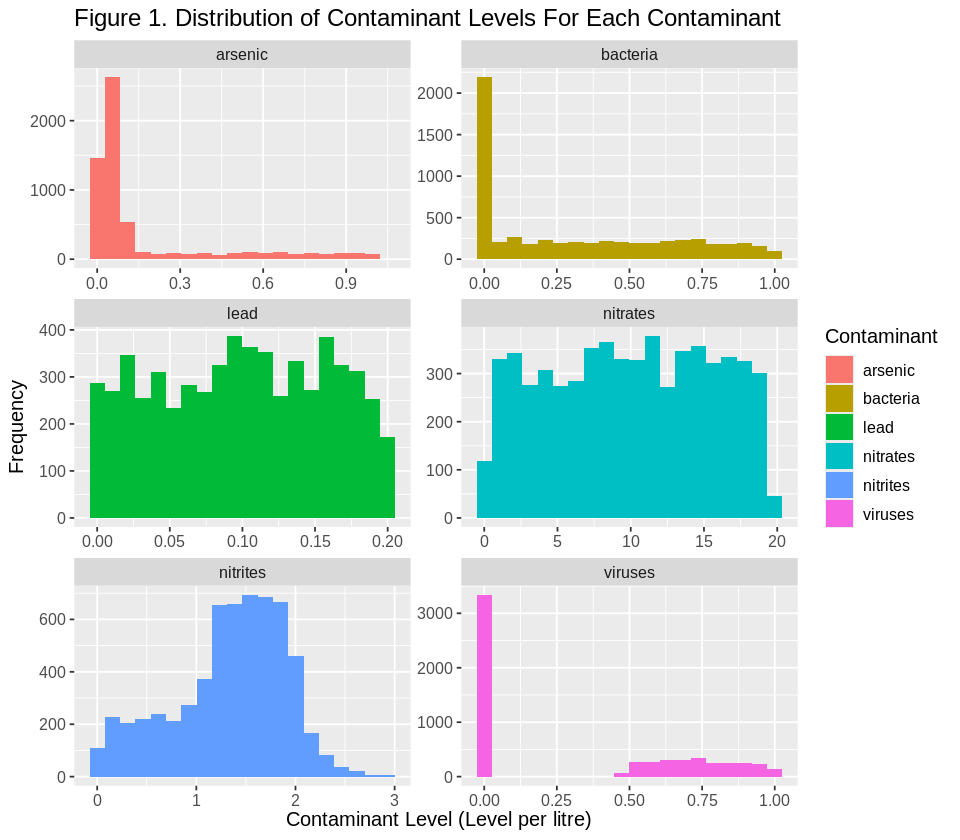

In [86]:
options(repr.plot.width = 8, repr.plot.height = 7)

water_train_plot <- water_wrangled |>
                    ggplot(aes(x=level, fill = contaminant)) +
                    geom_histogram(bins = 20) +
                    facet_wrap(vars(contaminant), scales = "free", nrow = 3) +
                    labs(x=" Contaminant Level (Level per litre)", y="Frequency", fill="Contaminant") +
                    ggtitle("Figure 1. Distribution of Contaminant Levels For Each Contaminant") +
                    theme(text = element_text(size = 12))
water_train_plot

*Figure 1 showcases one of many plots that can describe our situation. In this case, it shows the distribution of the various levels for each contaminant. The plotted histogram gives us a rough idea about the data we're working with; For instance, we can deduce that lead and nitrates have rather even distributions, whilst arsenic, bacteria, and viruses tend to have lower values in our dataset.*

*By summarizing and visualizing this data by count, we have now determined that this data is a good signal for classification, as there are some predictors that are concentrated in some areas, and some that are not concentrated in others, and as such, any new data can be predicted well due to the differences in the distribution between the predictors.*

***NOTE:*** *Each plot is on a different scale for readability, and was plotted using only the training data set.*

## 3. Methods <a id="3"></a>

### 3.1. Conducting our Data Analysis <a id="cond"></a>

To carry out this data analysis, we will be employing the k-nearest neighbors classification algorithm. This involves using the data on each existing observation's predictor values and whether or not the sample is safe to consume or not, and then using this data to "train our model," such that we can classify a new observation. Then, we will use our model to classify it using the predictors. To do this, we find the k-nearest data points (the points with the lowest euclidean distance), and then we simply choose whichever class the majority of the points have as our classification.

For our uses, 20 predictor variables is too high of a number, therefore, as mentioned earlier, we will limit our model to use the 6 most common contaminants in water: arsenic, bacteria, lead, nitrates, nitrites, and viruses, given in level per liter (United States Environmental Protection Agency, 2015). 

### 3.2 Preparing our Classifier <a id="3.2"></a>
Below, we will create a recipe, model, and workflow for our classifier. Due to our data being imbalanced as previously noted, we will upsample our data such that the lower of the two outcomes of the class variable holds more weight during our classification (in this case, the class with the lower amount of observations is the "safe" class).


In [47]:
set.seed(1)
# step 1: create a recipe for the training data. Since the data is imbalanced, we must import the themis library and upsample the data first.

water_temp <- recipe(is_safe ~ arsenic + bacteria + viruses + lead + nitrates + nitrites, data = water_train) |>
    step_naomit(all_predictors(), skip=TRUE) |>
    step_upsample(is_safe, over_ratio = 1, skip = FALSE) |>
    prep()

# step 2: using the upsampled data, we will create a "new" dataset for us to use
water_ups <- bake(water_temp, water_train)


# step 3: using the upsampled dataset, create a recipe, scaling and centering all predictors
water_recipe <- recipe(is_safe ~ arsenic + bacteria + viruses + lead + nitrates + nitrites, data = water_ups) |>
    step_scale(all_predictors())|>
    step_center(all_predictors()) |>
    prep()
    

# chechking to see if dataset is now balanced
'Table 4. As seen, the class variable is now balanced'
water_ups |>
  group_by(is_safe) |>
  summarize(n = n())

water_recipe

[1] "Table 4. As seen, the class variable is now balanced"

is_safe,n
<fct>,<int>
not safe,5313
safe,5313




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 6



── Training information 

Training data contained 10626 data points and no incomplete rows.



── Operations 

• Scaling for: arsenic, bacteria, viruses, lead, nitrates, nitrites | Trained

• Centering for: arsenic, bacteria, viruses, lead, nitrates, nitrites | Trained



### 3.3 Choosing the Number of Neighbors <a id="k"></a>
Now that we have prepared the "backbone" of our classification algorithm above, our next task is to figure out what to set our $k$ value to in order to yield the best results. Our definition of the "best" results are discussed further below, however, for the purposes of this project, we will mostly be looking to the highest accuracy to determine our best $k$ value. To find this $k$ value, we will perform cross validation with multiple $k$ values, figuring out which one has the highest mean accuracy, as shown:

In [12]:
set.seed(1)
#step 2: create a multiple training datasets to perform cross validation

water_vfold <- vfold_cv(water_ups, v = 5, strata = is_safe)

In [13]:
#step 3: create a classification model that allows us to tune the number of neighbors

water_knn <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
    set_engine('kknn') |>
    set_mode('classification')

In [14]:
set.seed(1)
#step 4: create a workflow that combines the recipe, model specification and that performs the vfold cross validation
grid_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 2))


knn_workflow <- workflow() |>
    add_recipe(water_recipe) |>
    add_model(water_knn) |>
    tune_grid(resamples = water_vfold, grid = grid_vals)

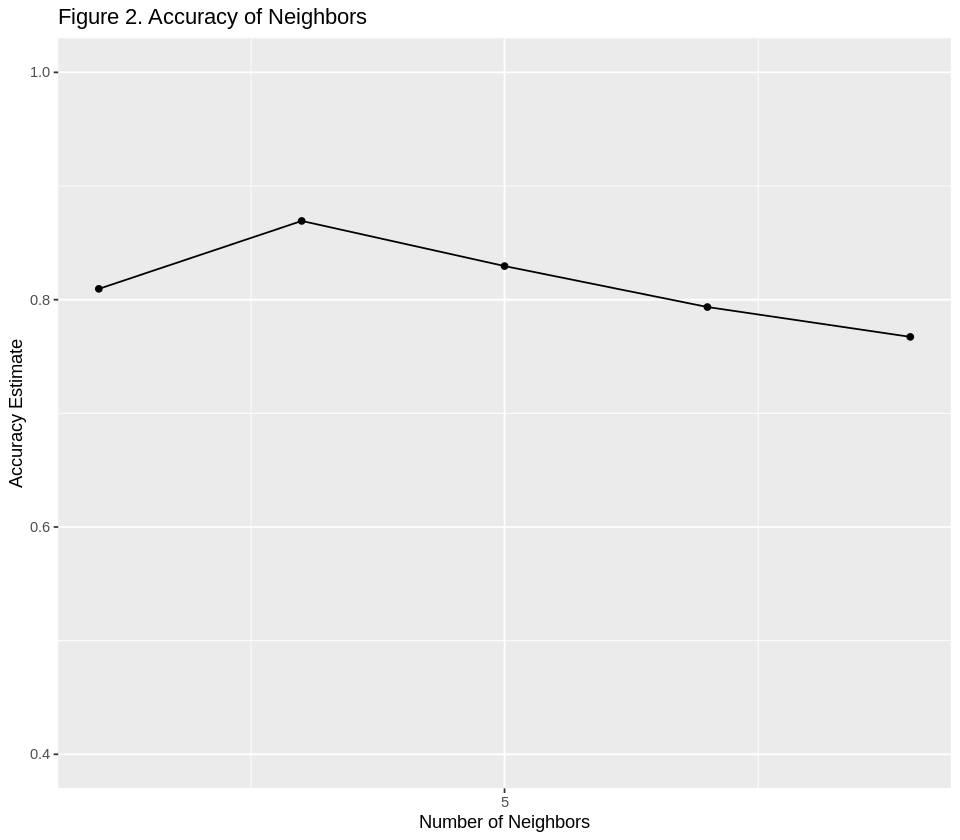

In [85]:
set.seed(1)
#step 5: collect the metrics to allow us to determine which k value is most resonable

knn_results <- knn_workflow |>
    collect_metrics()

#this plot depicts the accuracy of the model at each given value of n nearest neighbors
water_accuracy <- knn_results |>
    filter(.metric == 'accuracy')

recall_plot <- ggplot(water_accuracy, aes(x = neighbors, y = mean))+ 
                      geom_point()+
                      geom_line()+
                      labs(x = 'Number of Neighbors', y = 'Accuracy Estimate')+
                      ggtitle('Figure 2. Accuracy of Neighbors')+
                    scale_x_continuous(breaks = seq(0, 51, by = 5))+
                    scale_y_continuous(limits = c(0.4, 1.0))
                        
recall_plot

In [43]:
#determine which k value gives the most accurate model:

best_3_accuracy <- water_accuracy|>
    arrange(desc(mean))|>
    head(3)|>
    pull(neighbors)
'The three k-values with the best accuracy (in order) are:'
best_3_accuracy

[1] "The three k-values with the best accuracy (in order) are:"

[1] 3 5 1

In [44]:
set.seed(1)
#model 1 (1 nearest neighbor), test accuracy with testing data:

water_knn_1 <- nearest_neighbor(weight_func = 'rectangular', neighbors = 1) |>
    set_engine('kknn') |>
    set_mode('classification')

knn_workflow_1 <- workflow() |>
    add_recipe(water_recipe) |>
    add_model(water_knn_1) |>
    fit(data = water_train)

test_pred_1 <- predict(knn_workflow_1, water_test)|>
    bind_cols(water_test)

In [54]:
#model 2 (3 nearest neighbors), test accuracy with testing data:

water_knn_3 <- nearest_neighbor(weight_func = 'rectangular', neighbors = 3) |>
    set_engine('kknn') |>
    set_mode('classification')

knn_workflow_3 <- workflow() |>
    add_recipe(water_recipe) |>
    add_model(water_knn_3) |>
    fit(data = water_train)

test_pred_3 <- predict(knn_workflow_3, water_test)|>
    bind_cols(water_test)

In [53]:
#model 3 (5 nearest neighbors), test accuracy with testing data:

water_knn_5 <- nearest_neighbor(weight_func = 'rectangular', neighbors = 5) |>
    set_engine('kknn') |>
    set_mode('classification')

knn_workflow_5 <- workflow() |>
    add_recipe(water_recipe) |>
    add_model(water_knn_5) |>
    fit(data = water_train)

test_pred_5 <- predict(knn_workflow_5, water_test)|>
    bind_cols(water_test)

In [55]:
model_1_accuracy <- test_pred_1|>
    metrics(truth = is_safe, estimate = .pred_class)


model_2_accuracy <- test_pred_3|>
    metrics(truth = is_safe, estimate = .pred_class)


model_3_accuracy <- test_pred_5|>
    metrics(truth = is_safe, estimate = .pred_class)

'Table 5. Accuracy for k=1 with test data'
model_1_accuracy
'Table 6. Accuracy for k=3 with test data'
model_2_accuracy
'Table 7. Accuracy for k=5 with test data'
model_3_accuracy

[1] "Table 5. Accuracy for k=1 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.80740370
kap,binary,0.03408741


[1] "Table 6. Accuracy for k=3 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8479240
kap,binary,0.0332364


[1] "Table 7. Accuracy for k=5 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8694347
kap,binary,0.0512025


In [56]:
#now we can find the precision:

# here, we can find out how to pick our positive class by checking the "order" of the class in the data. 
# Run this cell to see why we used the word 'first' below to make unsafe water our positive class!
test_pred_1 |> pull(is_safe) |> levels()

# Finding precision with "unsafe" as our positive class
model_1_precision <- test_pred_1|>
    precision(truth = is_safe, estimate = .pred_class, event_level = 'first')



model_2_precision <- test_pred_3|>
    precision(truth = is_safe, estimate = .pred_class, event_level = 'first')



model_3_precision <- test_pred_5|>
    precision(truth = is_safe, estimate = .pred_class, event_level = 'first')

'Table 8. Precision for k=1 with test data'
model_1_precision
'Table 9. Precision for k=3 with test data'
model_2_precision
'Table 10. Precision for k=5 with test data'
model_3_precision

[1] "not safe" "safe"

[1] "Table 8. Precision for k=1 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8897638


[1] "Table 9. Precision for k=3 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8887122


[1] "Table 10. Precision for k=5 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8895769


In [57]:
#now we find the recall for our three models

# Finding recall with "unsafe" as our positive class
model_1_recall <- test_pred_1|>
    recall(truth = is_safe, estimate = .pred_class, event_level = 'first')



model_2_recall <- test_pred_3|>
    recall(truth = is_safe, estimate = .pred_class, event_level = 'first')



model_3_recall <- test_pred_5|>
    recall(truth = is_safe, estimate = .pred_class, event_level = 'first')


'Table 11. Recall for k=1 with test data'
model_1_recall
'Table 12. Recall for k=3 with test data'
model_2_recall
'Table 13. Recall for k=5 with test data'
model_3_recall

[1] "Table 11. Recall for k=1 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8932806


[1] "Table 12. Recall for k=3 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9469226


[1] "Table 13. Recall for k=5 with test data"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9734613


In [59]:
# Forming various confusion matrices to interpret our results

conf_1 <- test_pred_1|>
    conf_mat(truth = is_safe, estimate = .pred_class)



conf_2 <- test_pred_3|>
    conf_mat(truth = is_safe, estimate = .pred_class)


conf_3 <- test_pred_5|>
    conf_mat(truth = is_safe, estimate = .pred_class)

'Table 14. Confusion matrix for k=1 with test data'
conf_1 

'Table 15. Confusion matrix for k=3 with test data'
conf_2

'Table 16. Confusion matrix for k=5 with test data'
conf_3

[1] "Table 14. Confusion matrix for k=1 with test data"

          Truth
Prediction not safe safe
  not safe     1582  196
  safe          189   32

[1] "Table 15. Confusion matrix for k=3 with test data"

          Truth
Prediction not safe safe
  not safe     1677  210
  safe           94   18

[1] "Table 16. Confusion matrix for k=5 with test data"

          Truth
Prediction not safe safe
  not safe     1724  214
  safe           47   14

As seen above, our accuracy is the highest with $k=3, k=5,$ and $k=1$ with the training data and cross validation, with a peak at $k=3.$ This indicates that, in most cases, one may choose $k=3$ as the best $k$ value for this data. However, once we analyze how each of these $k$ values perform with the testing data, we can see that there are varying levels of accuracy, precision, and recall for all three, and in some cases, $k=3$ does not perform better under certain metrics (like recall and accuracy), while it performs better with others (like precision). *Note that this is occuring with this specific iteration, seed, and testing data, and results may vary, however, it is still interesting to note the following:*

For an issue such as water safety levels (with the positive class being labelling the water as "unsafe," as done here), false negatives are costly, as they falsely label unsafe water as "safe," which could harm people who use this classifier if they consume this water, as it would actually be unsafe despite its classification. This means that one may value recall over precision for this particular classifier, as recall measures how often our algorithm makes positive predictions correctly (in this context, how often it identifies contaminated water correctly). We can see with the recall analysis above, as well as the confusion matrix, that recall is maximized with this specific testing data at $k=5$, and as such is different from $k=3$ which was previously chosen for it's accuracy. As such, in future, it may be worth considering recall as one of the metrics in our cross-validation as well, so we can also determine which $k$ value truly maximizes that metric, as this analysis has shown us that there is a possibility of this value being different than the $k$ value that maximizes the accuracy.

### 3.4 Further Visualizing the Results <a id="vr"></a>
One way in which we can further visualize our results is by creating a scatterplot using our training data, choosing two predictors for the axes, and colouring the points according to class (safe or unsafe for consumption). From here, we can visually interpret how our k-nearest neighbors model classifies new observations, as well as simply seeing the spread of the data given two of the six predictor variables, seeing if there is any correlation between the two. For simplicity, we will be choosing two out of the six predictors at random for this visualization, as we cannot vizualize a 6th dimensional space, and two predictors (one on each axis) is enough to convey a meaningful visualization for our results simply to demonstrate how this algorithm can be interpreted.

For this visualization, as discussed, we will choose two of our predictors at random, and in this case, they will be arsenic and bacteria. We can plot them through the following:

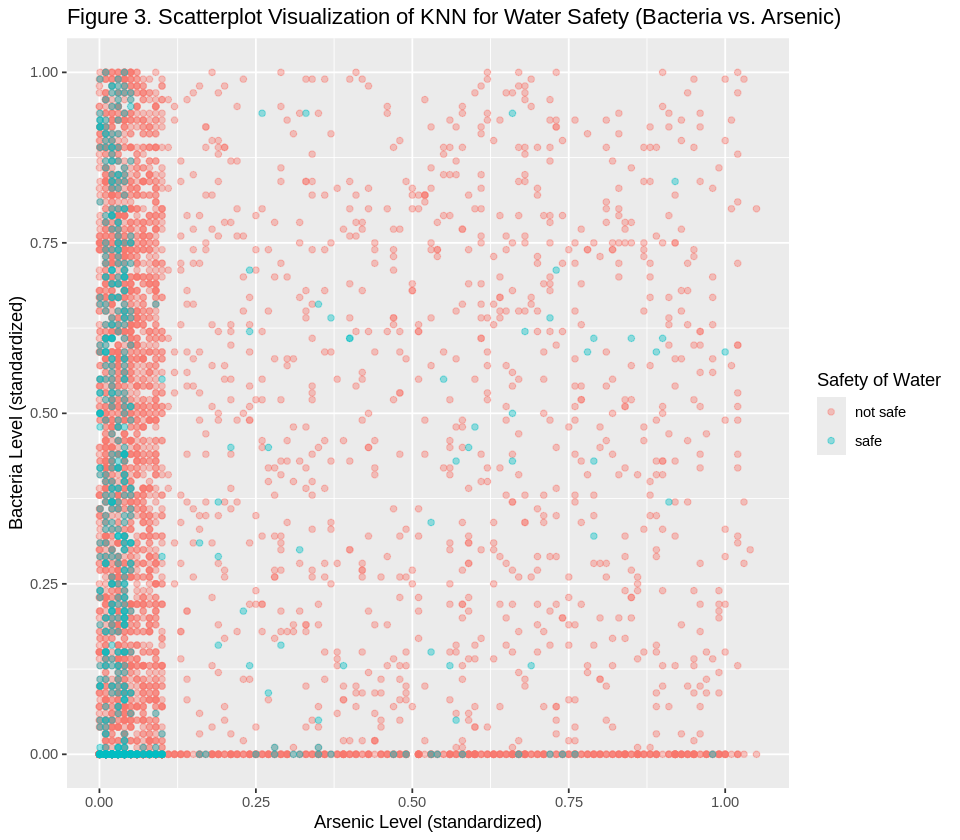

In [84]:
#Plotting the data
water_viz <- water_train |> ggplot(aes(x=arsenic, y=bacteria)) +
                            geom_point(aes(color=is_safe), alpha=0.4) +
                            labs(x="Arsenic Level (standardized)", y="Bacteria Level (standardized)", color="Safety of Water") +
                            ggtitle("Figure 3. Scatterplot Visualization of KNN for Water Safety (Bacteria vs. Arsenic)")

water_viz

Once again, in *Figure 3* above, the predictors on the axes were chosen at random and could have been any of the other predictors. However, this plot does a great job at giving us a glimpse at how our algorithm behaves; If we place a new prediction anywhere on the scatterplot above, we can visually see how its neighbors may influence it. For instance, we can observe that the safe water (blue dots) is concentrated in areas where contaminant levels are lower, which makes logical sense; as we stray further right and upwards on the plot, our water water has higher contaminant levels, and we can see that unsafe water (red dots) become much more prevalent than safe water (blue dots) after a certain threshold. Although there is no direct pattern we can see with these two variables, we have determined how the algorithm works, and since our predictors used in the plot were random, there is a chance that there is some sort of relationship between other predictors that we simply haven't plotted, or there is a relationship to be observed in some higher dimension (between more of the predictor variables) that is invisible through a 2-dimensional scatterplot.

## 4. Expected outcomes and significance <a id="4"></a>

Now that our analysis is complete, we have a working k-nearest neighbors model that can predict whether or not a water sample is safe, given the six predictor variables we have specified. We hope our findings can help find safe water sources around the world, and possibly also bring awareness to the public on the importance of how a safe water source can help limit the spread of gastrointestinal diseases and other related health issues, as well as inform people as to what contaminants they should be checking their water sources for.

As we have now collected our results, this may lead to serveral future questions and expansions of this project. For example, given that our classifier operates on a binary (water is either safe or unsafe, no inbetween), one may question if there is any sort of measurement to be made regarding *how* safe water is to drink, to analyze if one water source is cleaner than another.

## References: <a id="ref"></a>
World Health Organization. (September, 2023). *Drinking-water*. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/drinking-water 

United States Environmental Protection Agency. (2015, October). *Drinking water contaminants*. America’s Children and the Environment. https://www.epa.gov/sites/default/files/2015-10/documents/ace3_drinking_water.pdf 